In [2]:
from tensorflow import keras
# Conv2D() gets three parameters: # of kernel, kernel_size, and activation function
# padding to balance contribution of each pixel to feature map
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=1)

<Conv2D name=conv2d_1, built=False>

In [3]:
# pooling : reduce the size of feature map
# pooling does have employ weights. max pooling or average pooling
# pooling size = strides, pooling does not get overlapped
keras.layers.MaxPooling2D(2, strides=2, padding='valid')

<MaxPooling2D name=max_pooling2d, built=True>

In [5]:
# keras convolution layers get a 3D array as an input
# load MNIST fasion data
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 225.0

from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [33]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(50, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_cnn_model.keras', save_best_only=True) # save the best model
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9210 - loss: 0.2277


[0.2376382201910019, 0.9165833592414856]

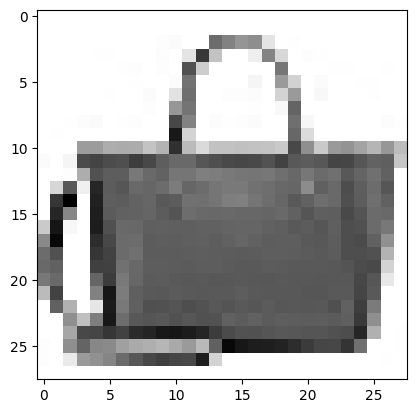

In [36]:
import matplotlib.pyplot as plt
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')

In [41]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled[0:1])) # select a categori with the highest probability
val_labels # 8 refers to a bag

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


8

In [42]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 225.0
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9036 - loss: 0.2665


[0.26169300079345703, 0.9023000001907349]

* Visualize CNN

In [45]:
model = keras.models.load_model('best_cnn_model.keras')

In [46]:
model.layers

[<Conv2D name=conv2d_6, built=True>,
 <MaxPooling2D name=max_pooling2d_5, built=True>,
 <Conv2D name=conv2d_7, built=True>,
 <MaxPooling2D name=max_pooling2d_6, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense_6, built=True>,
 <Dropout name=dropout_4, built=True>,
 <Dense name=dense_7, built=True>,
 <Dropout name=dropout_5, built=True>,
 <Dense name=dense_8, built=True>]

In [49]:
# weights and an intercept (bias) of the first layer
# first layer
conv = model.layers[0]
# their dimension
print(conv.weights[0].shape, conv.weights[1].shape)
import numpy as np
conv_weights = np.array(conv.weights[0])
print(np.mean(conv_weights), np.std(conv_weights))

(3, 3, 1, 32) (32,)
-0.010138937 0.19247018


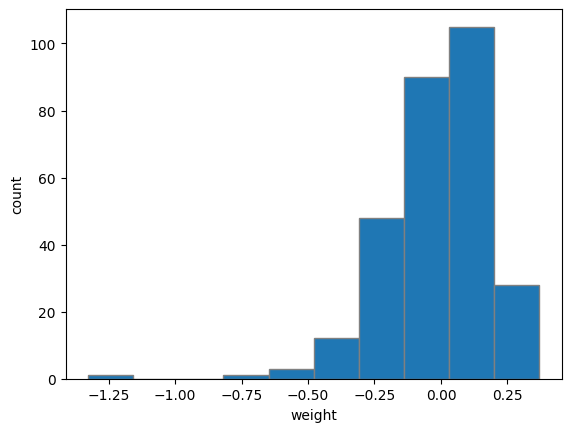

In [59]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1), edgecolor='gray')
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

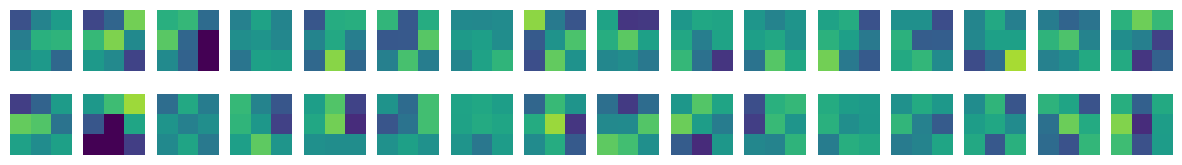

In [62]:
# print kernels
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show() # the brighter, the higher value a pixel has

In [64]:
conv_weights[0]

array([[[-0.2525998 , -0.2856658 ,  0.13110726, -0.05911735,
         -0.23228826,  0.15996037, -0.0261033 ,  0.32998964,
          0.07947684,  0.02862708,  0.02507943,  0.07496329,
          0.00162909, -0.04337703, -0.08195098,  0.13814124,
         -0.3133067 ,  0.03195425, -0.14295635,  0.17170604,
          0.05959977,  0.0135291 ,  0.08047354, -0.171417  ,
         -0.13488494,  0.02993009, -0.2603284 ,  0.1139657 ,
          0.00586289, -0.01319472,  0.14744578,  0.1259724 ]],

       [[-0.05369204, -0.17313965,  0.16603123,  0.07482184,
          0.11975283, -0.22561471, -0.03357756, -0.08953764,
         -0.34298953,  0.09712418, -0.05298442,  0.12044638,
          0.00269802,  0.10161287, -0.17944384,  0.27863795,
         -0.18084303,  0.19081023,  0.10343733, -0.05338093,
          0.22671026, -0.14955318,  0.09526235,  0.17518407,
         -0.32880545,  0.23178422,  0.13498324,  0.05738739,
          0.11283964,  0.15322374,  0.08484279, -0.19373485]],

       [[ 0.052298

In [83]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
no_training_conv = no_training_model.layers[0]
no_training_conv.weights[0].shape

TensorShape([3, 3, 1, 32])

In [67]:
no_training_weights = np.array(no_training_conv.weights[0])
print(np.mean(no_training_weights), np.std(no_training_weights))

-0.009033983 0.08068412


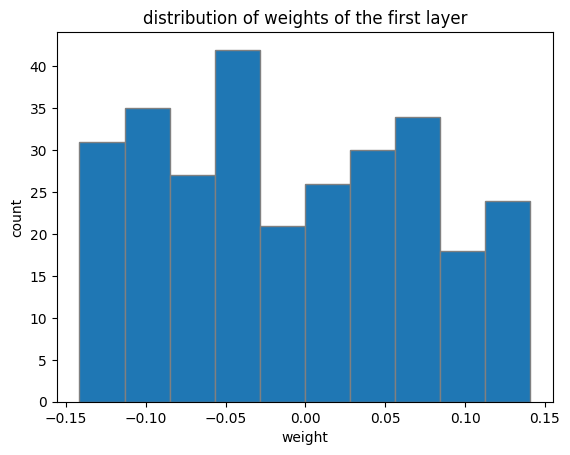

In [70]:
plt.hist(no_training_weights.reshape(-1,1),edgecolor='gray')
plt.xlabel('weight')
plt.ylabel('count')
plt.title('distribution of weights of the first layer')
plt.show()
# equally distributed in general; this is because tensorflow selects values at random during initialization
# compared to the distribution of the best weights, this distribution is not characteristic at all -> poorer performance

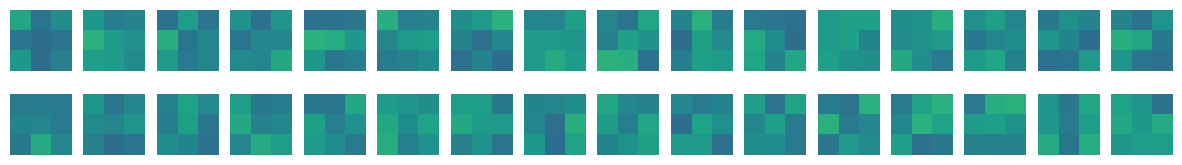

In [73]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [138]:
# functional API instead of Sequential()
# construct layers
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

inputs = keras.Input(shape=(784,))
hidden = dense1(inputs)
outputs = dense2(hidden)
model = keras.Model(inputs, outputs)

print(model.input)

<KerasTensor shape=(None, 784), dtype=float32, sparse=False, name=keras_tensor_136>


In [139]:
conv_acti = keras.Model(model.input, model.layers[0].output)

(60000, 28, 28) (28, 28)


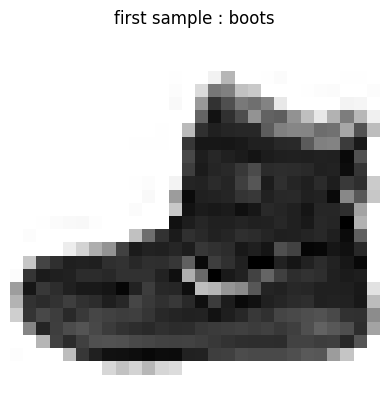

In [140]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
print(train_input.shape, train_input[0].shape)
plt.imshow(train_input[0], cmap='gray_r')
plt.axis('off')
plt.title('first sample : boots')
plt.show()

In [141]:
train_input[0:1].shape

(1, 28, 28)

In [155]:
# visualize feature maps
# inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
inputs = train_input[0].reshape(-1,784) / 255.0
feature_maps = conv_acti.predict(inputs)
feature_maps.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


(1, 784)

In [156]:
feature_maps = feature_maps.reshape(-1,28,28,1)
feature_maps.shape

(1, 28, 28, 1)

IndexError: index 1 is out of bounds for axis 3 with size 1

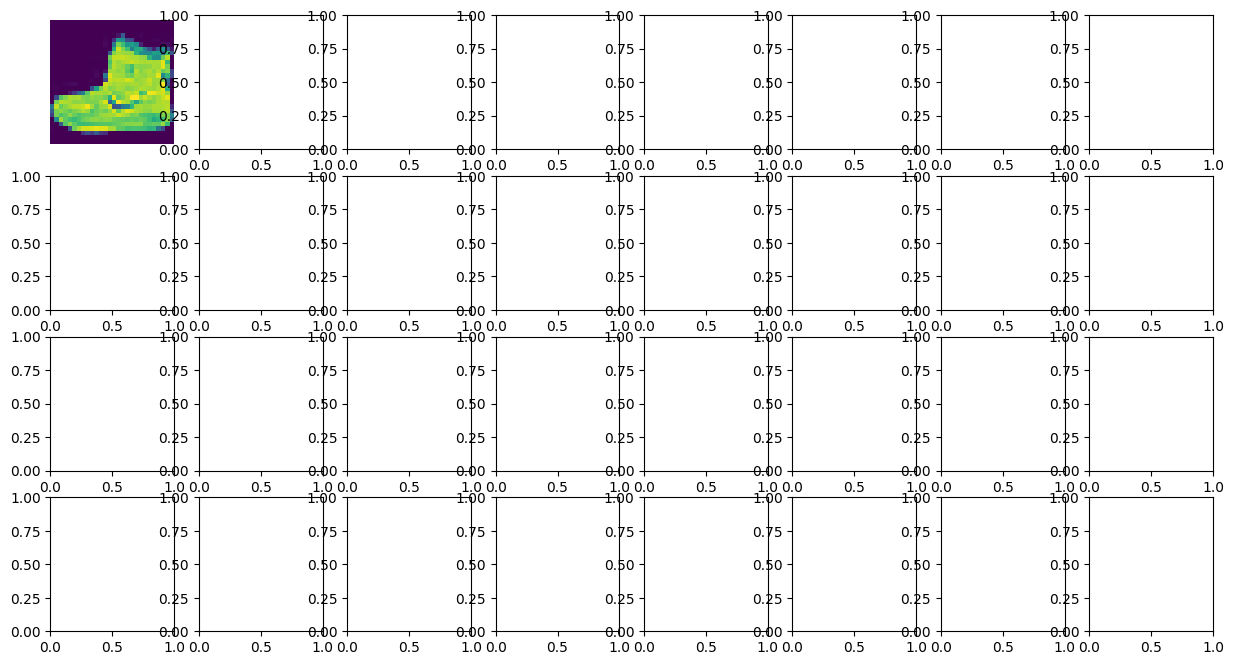

In [150]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i, j].axis('off')
plt.show()